# Manufacturing Data Science 製造數據科學 - Assignment 2
> R10725012 呂晟維

### Q1 (20%)

#### Q1-(a) 
**試簡述何謂維度的詛咒？試列舉一案例說明**

Ans:  
模型的參數數量與模型本身的複雜度與資料集的特徵維度呈正相關，
模型的參數數量越多，使模型達成收斂需要的資料筆數也就越多，當樣本數不足時會導致
1. 花很長時間學習但演算法不易收斂
2. 收斂時出現多重解 (multiple solutions) 或過度配適

簡而言之，特徵從零變多模型的預測能力一開始會提升，當過了最適的特徵個數，預測績效立即呈現指數遞減。

#### Q1-(b)
**避免維度詛咒的方法有哪些？**  
Ans  
1. 避免使用過多特徵，僅使用最適的特徵個數數量的作為訓練資料。
2. 檢查特徵間是否有共線性關係，若有則整合或剔除具共線性關係的特徵們。

#### Q1-(c)
試找一個開放數據 (e.g. Kaggle開放數據 或第一次作業紅酒數據集 )並選一種方法 (e.g. 線性迴歸或決策樹 )，用模擬方法 固定樣本數但逐步增加變數個數， 試著重新繪製圖 3.12， 呈現維度與預測 (或分類 )績效間的關係。

In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
# import statsmodels.stats.api as sms
# import scipy.stats as stats

In [2]:
# import wine data, x = f0~f27, y = grade
furnace_data = pd.read_csv("../MDS_Assignment1/MDS_Assignment1_furnace.csv")
print(furnace_data.shape)
display(furnace_data.head())

(620, 29)


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,grade
0,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129,2
1,-0.825098,-0.26425,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129,4
2,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,1.459782,1.221876,1.877777,0.271886,-0.232472,0.102129,2
3,0.511733,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.008030,-0.406366,1.504523,0.271886,-0.232472,0.102129,2
4,-0.825098,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.573268,-1.164793,1.877777,0.271886,-0.232472,0.102129,2


In [3]:
furnace_X = furnace_data.iloc[:, :-1] # params
furnace_y = furnace_data.iloc[:, -1] # label
furnace_X_const = sm.add_constant(furnace_X) # 做線性回歸前 要手動加上截距(常數項)
furnace_X_const = furnace_X_const.rename(columns={"const": "Intercept"})
display(furnace_X_const.head())
print('labels are:', set(furnace_y))

,Intercept,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27
0,1.0,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,...,0.182574,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129
1,1.0,-0.825098,-0.26425,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,...,0.182574,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129
2,1.0,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,...,0.182574,0.085505,0.233285,0.925358,1.459782,1.221876,1.877777,0.271886,-0.232472,0.102129
3,1.0,0.511733,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,...,0.182574,0.085505,0.233285,0.925358,-0.008030,-0.406366,1.504523,0.271886,-0.232472,0.102129
4,1.0,-0.825098,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,...,0.182574,0.085505,0.233285,0.925358,-0.573268,-1.164793,1.877777,0.271886,-0.232472,0.102129


labels are: {0, 1, 2, 3, 4}


In [36]:
# (1) 整體資料先做線性迴歸；
# (2) 依 p value 小至大排序選出重要變數；
furnace_model = sm.OLS(furnace_y, furnace_X_const)
furnace_result = furnace_model.fit()
# print(furnace_result.summary())
print('rsquared:', furnace_result.rsquared, '\nrsquared_adj:', furnace_result.rsquared_adj)

furnace_pvalues = furnace_result.pvalues
print(furnace_pvalues.sort_values().head(3)) # p 越小影響力越大
print(furnace_pvalues.sort_values().tail(3)) # p 越大影響力越小

sorted_pvalues = list(furnace_pvalues.sort_values().keys())
print(f"sorted_pvalues: {sorted_pvalues}")

rsquared: 0.4953759883189156 
rsquared_adj: 0.47236104184021754
Intercept    0.000000e+00
f18          6.355895e-19
f2           2.430368e-18
dtype: float64
f4     0.927523
f9     0.976734
f12    0.978520
dtype: float64
sorted_pvalues: ['Intercept', 'f18', 'f2', 'f14', 'f15', 'f22', 'f17', 'f25', 'f6', 'f5', 'f8', 'f10', 'f16', 'f26', 'f1', 'f11', 'f13', 'f21', 'f19', 'f7', 'f24', 'f20', 'f3', 'f23', 'f27', 'f0', 'f4', 'f9', 'f12']


In [45]:
# 這個 function 吃全域變數喔

def make_formula(numOfParam: int) -> str:
    ''' 1 <= numOfParam <= 28 \n
    no need to add constant \n
    example output formula with numOfParam = 4:
    `grade ~ f0 + f1 + f2 + f3` '''
    if numOfParam < 1:
        numOfParam = 1
    if numOfParam > 28:
        numOfParam = 28
    param_lst = sorted_pvalues[1:]

    s = f"{furnace_data.columns[-1]} ~" # label
    first_param = True
    for x in param_lst[:numOfParam]:
        if first_param:
            s += f' {x}' # s += ' param'
            first_param = False
        else:
            s += f' + {x}' # s += ' + param'
    return s

make_formula(1) # min param
make_formula(28) # max param

'grade ~ f18 + f2 + f14 + f15 + f22 + f17 + f25 + f6 + f5 + f8 + f10 + f16 + f26 + f1 + f11 + f13 + f21 + f19 + f7 + f24 + f20 + f3 + f23 + f27 + f0 + f4 + f9 + f12'

In [ ]:
list(range(1, numOfTest+1))

rsquared_adj with 1 params: 0.0768328566497618
rsquared_adj with 2 params: 0.2733340635593492
rsquared_adj with 3 params: 0.3698974444769454
rsquared_adj with 4 params: 0.403183398054795
rsquared_adj with 5 params: 0.40785545925955646
rsquared_adj with 6 params: 0.42001562082854216
rsquared_adj with 7 params: 0.4285362248761698
rsquared_adj with 8 params: 0.43853624721293083
rsquared_adj with 9 params: 0.45807965568098774
rsquared_adj with 10 params: 0.46265152545839194
rsquared_adj with 11 params: 0.463196399481141
rsquared_adj with 12 params: 0.4638875207178982
rsquared_adj with 13 params: 0.463205216427506
rsquared_adj with 14 params: 0.46887115935744694
rsquared_adj with 15 params: 0.4710314997153918
rsquared_adj with 16 params: 0.47380057970710177
rsquared_adj with 17 params: 0.4743601222244074
rsquared_adj with 18 params: 0.47793486673311314
rsquared_adj with 19 params: 0.47772708760295834
rsquared_adj with 20 params: 0.4773850741928837
rsquared_adj with 21 params: 0.476926884878

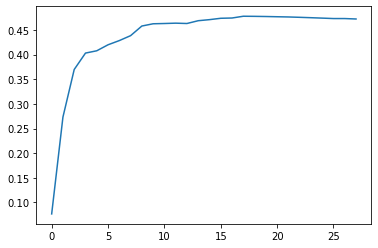

In [54]:
# (3) 將重要的變數一個個依序放入迴歸並計算 adjusted R2 作為預測準確度
# formula string format: 'Label ~ param1 + param2 ...'
numOfTest = len(sorted_pvalues[1:])
rsquared_adj_lst = []

for i in range(1, numOfTest+1):
    formula_str = make_formula(i)
    result = smf.ols(formula=formula_str, data=furnace_data).fit()
    print(f'rsquared_adj with {i} params: {result.rsquared_adj}')
    rsquared_adj_lst.append(result.rsquared_adj)

plt.plot(rsquared_adj_lst)

# result = smf.ols(formula=formula_str, data=furnace_data).fit()
# print('rsquared:', result.rsquared, '\nrsquared_adj:', result.rsquared_adj)

### Q2 (20%)

#### Q2-(a)
試找一個開放數據 (e.g. Kaggle開放數據 )，您會用什麼方法來確認資料品質的好壞?試操作一次並說明其細節

#### Q2-(b)
公司或您 是否有現存方法來進行資料品質的確認？如果有(或沒有)，試依您的角度說明(或建議)確認資料品質的標準作業流程 (i.e. SOP)。

#### Q2-(c)
試建議三個可能衡量數據品質的量化指標 (i.e. KPIs)。

### Q3 (20%) 在數據科學分析架構中的決策支援階段

#### Q3-(a)
什麼是模型的適應性與擴充性?

#### Q3-(b)
在AI專案中(可根據第一題的開放數據與模型)，就您所使用的數據與建構預測模型是否具備適應性與擴充性?為什麼?該如何改善與調整?

#### Q4 (10%) 
遺漏值填補的方法包括了統計量填補 、預測式與生成式填補

#### Q4-(a)
試說明這些方法分別適用於什麼樣情形

#### Q4-(b)
為什麼某特徵存在大量遺漏值不宜直接刪除？

### Q5 (30%) 
在 UCI Machine Learning Repository 開放數據中包含了一個鋼板缺陷數據 (steel plates faults dataset https://archive.ics.uci.edu/ml/datasets/steel+plates+faults)，一共包含了1,941個觀測值，而每個觀測值具有 27個特徵以及作為目標值的7種缺陷。試挑選出凹凸不平(Bumps)以及刮痕(K_Scratch)兩種缺陷進行分析

#### Q5-(1)
試將羅吉斯迴歸分析的結果呈現如下表，並試著解釋任一特徵與目標值之間的關係。
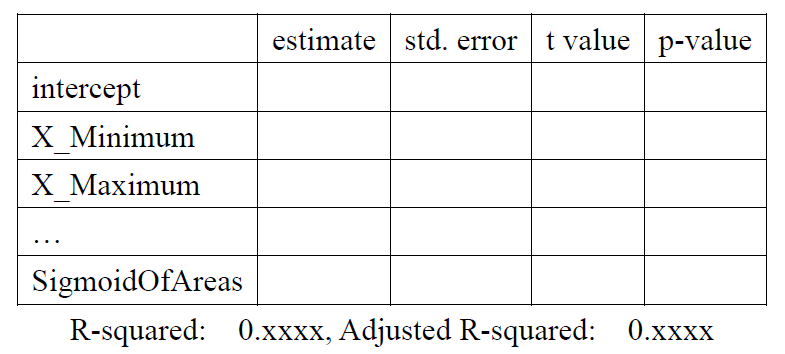

#### Q5-(2) 
基於上述(1)的 結果，將上述特徵以t-value進行排序後，哪些特徵的迴 歸係數在統計上是顯著的呢(p-value<0.01)?

#### Q5-(3) 
試問配適一個羅吉斯迴歸模型是否合適？試若配適不佳，試說明其可能的原因為何？

#### Q5-(4)
試問配適一個線性判別分析模型是否合適？若配適不佳，試說明其可能的原因為何？

#### Q5-(5)
試問配適一個二次判別分析模型是否合適？若配適不佳，試說明其可能的原因為何？